# Chapter 

Course repo: https://github.com/mikexcohen/LinAlg4DataScience/tree/main

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

# Make outputs show up to 4 decimals
np.set_printoptions(suppress=True, precision=4)


# Ex. 6.1 
 The norm of a matrix is related to the scale of the numerical values in the matrix. In
 this exercise, you will create an experiment to demonstrate this. In each of 10 experiment
 iterations, create a 10 × 10 random numbers matrix and compute its Frobenius
 norm. 
 
 Then repeat this experiment 40 times, each time scalar multiplying the matrix
 by a different scalar that ranges between 0 and 50. The result of the experiment
 will be a 40 × 10 matrix of norms. Figure 6-7 shows the resulting norms, averaged
 over the 10 experiment iterations. This experiment also illustrates two additional
 properties of matrix norms: they are strictly nonnegative and can equal 0 only for the
 zeros matrix.

In [12]:
np.random.seed(42)  # Set the seed for reproducibility

# Create a random 10x10 matrix with integers
A = np.round(np.random.randn(10, 10)*10, 0)

# Compute frobenius norm
def frobenius_norm(A):
    # For each row vector in the matrix we'll square the elements of the vector and get the sum 
    sum_squared_matrix = 0

    for row_vector in A: 
        # Square elements in the vector
        sum_squared_i = np.sum(row_vector ** 2)

        # Add to norm 
        sum_squared_matrix = sum_squared_matrix + sum_squared_i

    # Get square root 
    f_norm = sum_squared_matrix**(1/2)

    return f_norm

In [13]:
A


array([[  5.,  -1.,   6.,  15.,  -2.,  -2.,  16.,   8.,  -5.,   5.],
       [ -5.,  -5.,   2., -19., -17.,  -6., -10.,   3.,  -9., -14.],
       [ 15.,  -2.,   1., -14.,  -5.,   1., -12.,   4.,  -6.,  -3.],
       [ -6.,  19.,  -0., -11.,   8., -12.,   2., -20., -13.,   2.],
       [  7.,   2.,  -1.,  -3., -15.,  -7.,  -5.,  11.,   3., -18.],
       [  3.,  -4.,  -7.,   6.,  10.,   9.,  -8.,  -3.,   3.,  10.],
       [ -5.,  -2., -11., -12.,   8.,  14.,  -1.,  10.,   4.,  -6.],
       [  4.,  15.,  -0.,  16., -26.,   8.,   1.,  -3.,   1., -20.],
       [ -2.,   4.,  15.,  -5.,  -8.,  -5.,   9.,   3.,  -5.,   5.],
       [  1.,  10.,  -7.,  -3.,  -4., -15.,   3.,   3.,   0.,  -2.]])

In [55]:
# Test 
print(frobenius_norm(A))

# Test 
print(np.linalg.norm(A, 'fro'))

91.19210492142398
91.19210492142398


In [14]:
# Store outputs in a 40 by 10 matrix 
final_matrix = np.zeros((40, 10))

# Scaling factors 
scalingVals = np.linspace(0,50,40) # range of scaling parameters (0 to 50 in 40 steps)

# Number of experiments
n_experiments = 10

# Repeat process 40 times 
for i in range(len(scalingVals)):
    # Perform 10 experiments 
    # Store the results in a vector of norms obtained 
    norms_i = np.zeros((n_experiments, 1))

    for exp in range(n_experiments):
        # Create a random 10x10 matrix with integers and multiply it by the scalar
        M = np.round(np.random.randn(10, 10)*10, 0) * scalingVals[i]

        # Compute frobenius norm of the matrix
        norm_exp = frobenius_norm(M)

        # Store the norm in our vector 
        norms_i[exp] = norm_exp 
    
    # Add vector of norms to final output 
    final_matrix[i] = norms_i.T

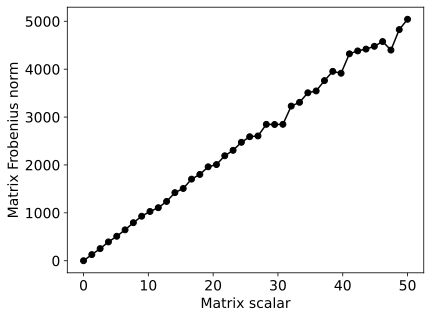

In [15]:
plt.plot(scalingVals,np.mean(final_matrix,axis=1),'ko-')
plt.xlabel('Matrix scalar')
plt.ylabel('Matrix Frobenius norm')
plt.show()

In [58]:
final_matrix

array([[   0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
           0.    ,    0.    ,    0.    ,    0.    ],
       [ 142.2615,  127.3174,  124.9721,  132.9321,  133.7272,  123.2237,
         121.8354,  117.7395,  133.9237,  124.2466],
       [ 250.509 ,  253.3795,  243.8325,  232.2318,  277.9066,  229.9844,
         239.1498,  288.3105,  248.1225,  262.517 ],
       [ 386.5145,  410.1342,  413.6896,  395.612 ,  435.0066,  330.6798,
         402.6355,  356.1588,  419.9183,  375.5075],
       [ 513.6916,  543.0331,  484.5001,  512.3588,  450.4363,  522.7752,
         525.6098,  516.9068,  524.7585,  513.8707],
       [ 588.7324,  655.0391,  625.7802,  593.425 ,  640.3201,  657.2936,
         621.4644,  727.3028,  696.8925,  640.4164],
       [ 735.7321,  732.6292,  812.0396,  756.9794,  788.5647,  743.0944,
         858.3388,  860.3013,  814.477 ,  840.576 ],
       [ 902.8491,  967.3593,  925.5345,  939.8258,  948.3991,  983.0918,
         887.1915,  899.4081,  912.12

___________
# Ex 6.2

 In this exercise, you will write an algorithm that finds a scalar that brings the
 Frobenius distance between two matrices to 1. Start by writing a Python function
 that takes two matrices (of the same size) as input and returns the Frobenius distance
 between them. 
 
 Then create two N × N random numbers matrices (I used N = 7 in
 the solutions code, but you can use any other size). Create a variable s = 1 that
 scalar multiplies both matrices. Compute the Frobenius distance between the scaled
 matrices.
 
  As long as that distance remains above 1, set the scalar to be .9 times itself
 and recompute the distance between the scaled matrices. This should be done in
 a while loop. When the Frobenius distance gets below 1, quit the while loop and
 report the number of iterations (which corresponds to the number of times that the
 scalar s was multiplied by .9) and the scalar value.

In [16]:
def frobenius_dist(A, B): 
    # Compute difference of matrix 
    A_B = A - B

    # Compute Frobenius norm of the difference
    return np.linalg.norm(A_B, 'fro')

# Create 2 NxN random number matrixes 
N = 7
np.random.seed(42)  # Set the seed for reproducibility
A = np.round(np.random.randn(N, N)*10, 0)
B = np.round(np.random.randn(N, N)*10, 0)

# Create a scalar for both matrices 
s = 1 

# Define d 
d = 100

# Start count 
iter = 0

while d > 1: 
    # Compute frobenius disance 
    d = frobenius_dist(A*s, B*s)
    print(f'Scalar: {s: .5f} - Distance: {d :.1f} - Iteration: {iter}')
    
    # Adjust scalar
    s = 0.9 * s

    iter += 1

    

Scalar:  1.00000 - Distance: 95.4 - Iteration: 0
Scalar:  0.90000 - Distance: 85.8 - Iteration: 1
Scalar:  0.81000 - Distance: 77.2 - Iteration: 2
Scalar:  0.72900 - Distance: 69.5 - Iteration: 3
Scalar:  0.65610 - Distance: 62.6 - Iteration: 4
Scalar:  0.59049 - Distance: 56.3 - Iteration: 5
Scalar:  0.53144 - Distance: 50.7 - Iteration: 6
Scalar:  0.47830 - Distance: 45.6 - Iteration: 7
Scalar:  0.43047 - Distance: 41.1 - Iteration: 8
Scalar:  0.38742 - Distance: 36.9 - Iteration: 9
Scalar:  0.34868 - Distance: 33.3 - Iteration: 10
Scalar:  0.31381 - Distance: 29.9 - Iteration: 11
Scalar:  0.28243 - Distance: 26.9 - Iteration: 12
Scalar:  0.25419 - Distance: 24.2 - Iteration: 13
Scalar:  0.22877 - Distance: 21.8 - Iteration: 14
Scalar:  0.20589 - Distance: 19.6 - Iteration: 15
Scalar:  0.18530 - Distance: 17.7 - Iteration: 16
Scalar:  0.16677 - Distance: 15.9 - Iteration: 17
Scalar:  0.15009 - Distance: 14.3 - Iteration: 18
Scalar:  0.13509 - Distance: 12.9 - Iteration: 19
Scalar:  0

# Ex 6.3

 Demonstrate that the trace method and the Euclidean formula produce the same
 result (the Frobenius norm). 
 
 Does the trace formula work only for ATA, or do you
 get the same result for AAT?

 ||A||F = sqrt( tr(A'A))

In [60]:
np.random.seed(42)  # Set the seed for reproducibility
# Create a matrix
A = np.round(np.random.randn(10, 10)*10, 0)

# Compute Frobenius norm 
f_norm = np.linalg.norm(A, 'fro')

# Compute using trace method 
trace_method = np.sqrt(np.trace(A.T @ A))

print(f_norm)
print(trace_method)



91.19210492142398
91.19210492142398


# Ex 6.4

 This will be a fun exercise,7 because you’ll get to incorporate material from this and
 the previous chapters. 
 
 You will explore the impact of shifting a matrix on the norm
 of that matrix. 
 
 Start by creating a 10 × 10 random matrix and compute its Frobenius
 norm. 
 
 Then code the following steps inside a for loop: (1) shift the matrix by a
 fraction of the norm, (2) compute the percent change in norm from the original,
 (3) compute the Frobenius distance between the shifted and original matrices, and
 (4) compute the correlation coefficient between the elements in the matrices (hint:
 correlate the vectorized matrices using np.flatten()).
 
  The fraction of the norm that
 you shift by should range from 0 to 1 in 30 linearly spaced steps. Make sure that at
 each iteration of the loop, you use the original matrix, not the shifted matrix from the
 previous iteration. You should get a plot that looks like 

In [61]:
# Create a function to shift a matrix's diagonal 
def shift_matrix(M, shift): 
    # Create a matrix to shift diagonal by adding
    shifting_matrix = np.zeros((M.shape[0], M.shape[1]))

    # Fill diagonal with shifting value
    np.fill_diagonal(shifting_matrix, shift)

    # Shift the matrix 
    M_shifted = M + shifting_matrix 

    return M_shifted


In [62]:
# Create matrix
A = np.round(np.random.randn(10, 10)*10, 0)

A

array([[-14.,  -4.,  -3.,  -8.,  -2.,   4.,  19.,   2.,   3.,  -1.],
       [-19.,  -0.,   1.,  25.,  -2.,   3.,  -0., -12.,  11.,   8.],
       [  8.,  -9.,  14., -14.,   6.,  22., -10.,  -6.,   1.,  -5.],
       [-16.,   1., -11.,   5.,  -9.,  15.,  -8.,  -3.,   8., -12.],
       [  2.,  13., -16.,   2.,   3.,   8., -12., -13.,   5.,   3.],
       [  3.,   3.,  -7.,   2.,   3.,  -7.,  19.,   5., -12.,   7.],
       [-10.,   8.,  12.,  -8.,  10.,   4.,   8.,  19.,  -2.,  -8.],
       [ -9.,  -8.,  -1.,   3.,   3.,   8.,   0.,  15.,  -3.,  27.],
       [  6.,  -9., -11.,   5.,  -2.,   7.,   5.,  -1.,  -8., -15.],
       [ -4.,   9.,   2., -12.,   2.,   4.,  -9.,   2.,   1., -11.]])

In [63]:
# Test shfiting function
shift_matrix(A, 1)

array([[-13.,  -4.,  -3.,  -8.,  -2.,   4.,  19.,   2.,   3.,  -1.],
       [-19.,   1.,   1.,  25.,  -2.,   3.,   0., -12.,  11.,   8.],
       [  8.,  -9.,  15., -14.,   6.,  22., -10.,  -6.,   1.,  -5.],
       [-16.,   1., -11.,   6.,  -9.,  15.,  -8.,  -3.,   8., -12.],
       [  2.,  13., -16.,   2.,   4.,   8., -12., -13.,   5.,   3.],
       [  3.,   3.,  -7.,   2.,   3.,  -6.,  19.,   5., -12.,   7.],
       [-10.,   8.,  12.,  -8.,  10.,   4.,   9.,  19.,  -2.,  -8.],
       [ -9.,  -8.,  -1.,   3.,   3.,   8.,   0.,  16.,  -3.,  27.],
       [  6.,  -9., -11.,   5.,  -2.,   7.,   5.,  -1.,  -7., -15.],
       [ -4.,   9.,   2., -12.,   2.,   4.,  -9.,   2.,   1., -10.]])

In [64]:
# Create a vector of 30 values between 0 and 1 to be the fractions 
shifting_fractions = np.linspace(0,1,30)

# Create a vector to store our new norms post shifts
new_norms = np.zeros((30 , 1))

# Create a vector to store the distances between original and new matrices
frobenius_distances = np.zeros((30, 1))

# Create a vector to store correlation coefficients 
corr_coeficients = np.zeros((30, 1))

# Compute Frobenius norm 
f_norm_original = np.linalg.norm(A, 'fro')


for i in range(len(shifting_fractions)):
    # Set shift 
    shift = shifting_fractions[i]

    # Shift matrix by a pct of the original norm
    A_shifted = shift_matrix(A, shift*f_norm_original)

    # Compute norm of the shifted matrix 
    f_norm = np.linalg.norm(A_shifted, 'fro')

    # Add it to our new norms vector 
    new_norms[i] = f_norm

    # Compute frobenius distance between original matrix and new shifted matrix
    frobenius_distances[i] = frobenius_dist(A, A_shifted)

    # Compute correlation coefficient 
    corr_coeficients[i] = np.corrcoef(A.flatten(), A_shifted.flatten())[0, 1]


In [65]:
shifting_fractions

array([0.    , 0.0345, 0.069 , 0.1034, 0.1379, 0.1724, 0.2069, 0.2414,
       0.2759, 0.3103, 0.3448, 0.3793, 0.4138, 0.4483, 0.4828, 0.5172,
       0.5517, 0.5862, 0.6207, 0.6552, 0.6897, 0.7241, 0.7586, 0.7931,
       0.8276, 0.8621, 0.8966, 0.931 , 0.9655, 1.    ])

In [66]:
# Compute pct change in the shifted norms 
new_norms_pct_change = (new_norms - f_norm_original) / f_norm_original

new_norms_pct_change

array([[0.    ],
       [0.0077],
       [0.027 ],
       [0.0573],
       [0.0976],
       [0.1469],
       [0.2041],
       [0.2681],
       [0.3379],
       [0.4127],
       [0.4917],
       [0.5744],
       [0.66  ],
       [0.7483],
       [0.8388],
       [0.9313],
       [1.0253],
       [1.1208],
       [1.2176],
       [1.3155],
       [1.4143],
       [1.5139],
       [1.6143],
       [1.7154],
       [1.8171],
       [1.9193],
       [2.022 ],
       [2.1251],
       [2.2286],
       [2.3324]])

In [85]:
# Store all results in a matrix
shifting_results = np.zeros((30, 3))

shifting_results[:, 0] = new_norms_pct_change[:, 0]*100

shifting_results[:, 1] = corr_coeficients[:, 0]

shifting_results[:, 2] = frobenius_distances[:, 0]

shifting_results

array([[  0.    ,   1.    ,   0.    ],
       [  0.7727,   0.9947,  10.3758],
       [  2.704 ,   0.9793,  20.7516],
       [  5.7302,   0.9552,  31.1274],
       [  9.7609,   0.9244,  41.5033],
       [ 14.6902,   0.8889,  51.8791],
       [ 20.4079,   0.8507,  62.2549],
       [ 26.8072,   0.8114,  72.6307],
       [ 33.7905,   0.7723,  83.0065],
       [ 41.2712,   0.7342,  93.3823],
       [ 49.1744,   0.6977, 103.7582],
       [ 57.4366,   0.6632, 114.134 ],
       [ 66.0041,   0.6308, 124.5098],
       [ 74.832 ,   0.6005, 134.8856],
       [ 83.883 ,   0.5723, 145.2614],
       [ 93.1255,   0.5461, 155.6372],
       [102.5334,   0.5218, 166.0131],
       [112.0847,   0.4992, 176.3889],
       [121.7609,   0.4782, 186.7647],
       [131.5462,   0.4587, 197.1405],
       [141.4275,   0.4406, 207.5163],
       [151.3933,   0.4238, 217.8921],
       [161.4341,   0.408 , 228.2679],
       [171.5416,   0.3933, 238.6438],
       [181.7084,   0.3796, 249.0196],
       [191.9285,   0.366

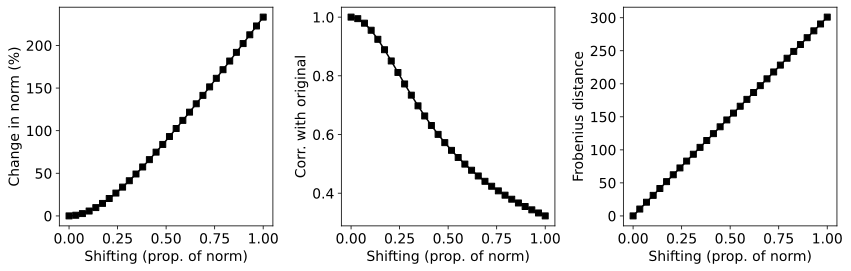

In [86]:
# PLOTTING
resultsNames = [ 'Change in norm (%)', 'Corr. with original', 'Frobenius distance' ]

## plotting!
_,axs = plt.subplots(1,3,figsize=(12,4))

for i in range(3):

  # plot the results
  axs[i].plot(shifting_fractions ,shifting_results[:,i],'ks-')
  axs[i].set_xlabel('Shifting (prop. of norm)')
  axs[i].set_ylabel(resultsNames[i])

plt.tight_layout()
plt.show()

# Ex 6.5 

 I will now show you how to create random matrices with arbitrary rank (subject
 to the constraints about matrix sizes, etc.).
 
 To create an M × N matrix with rank r,
 multiply a random M × r matrix with an r × N matrix. Implement this in Python and
 confirm that the rank is indeed r.
 
  What happens if you set r > min{M,N}, and why
 does that happen?

In [40]:
# Define your matrix sizes 
M = 4
N = 5

# Define your rank 
r = 4

# Create a random matrix from the normal distributions rounding to integers 
matrix_M = np.round(np.random.randn(M, r)*10)

print('Matrix M X r:')
print(matrix_M)
print('')

# Create a random matrix from the normal distributions rounding to integers 
matrix_N = np.round(np.random.randn(r, N)*10)

print('Matrix r X N:')
print(matrix_N)
print('')


# Multiply them 
rank_r_matrix = matrix_M @ matrix_N

print(f'Ranked {r} matrix')
print(rank_r_matrix)
print("")
rank = np.linalg.matrix_rank(rank_r_matrix)

print(f'Computed rank = {rank}')

Matrix M X r:
[[  6.   3.  31.  11.]
 [ -1. -10. -16.   2.]
 [ -8. -14.  -6. -11.]
 [ 17.   9.  -0.  15.]]

Matrix r X N:
[[  1.  -9.  15.   5. -10.]
 [ -2.  -9. -14.   9.  19.]
 [-14.   6.  -7.  -5.  -6.]
 [ -9.   0.  -8.   3.  -1.]]

Ranked 4 matrix
[[-533.  105. -257.  -65. -200.]
 [ 225.    3.  221.   -9.  -86.]
 [ 203.  162.  206. -169. -139.]
 [-136. -234.    9.  211.  -14.]]

Computed rank = 4


# Ex 6.6 

 Demonstrate the addition rule of matrix rank (r(A + B) ≤ r(A) + r(B)) by creating
 three pairs of rank-1 matrices that have a sum with (1) rank-0, (2) rank-1, and (3)
 rank-2. 
 
 Then repeat this exercise using matrix multiplication instead of addition.

In [ ]:
# Case 1: Sum with rank = 0

# Create 2 rank 1 matrices that when added will return the 0 matrix
A = np.diag([ 1,0,0])
B = np.diag([-1,0,0])
A_plus_B = A + B

print(f'A: Rank = {np.linalg.matrix_rank(A)}')
print(A)
print('')
print(f'B: Rank = {np.linalg.matrix_rank(B)}')
print(B)
print('')
print(f'A + B: Rank = {np.linalg.matrix_rank(A_plus_B)}')
print(A_plus_B)

A: Rank = 1
[[1 0 0]
 [0 0 0]
 [0 0 0]]

B: Rank = 1
[[-1  0  0]
 [ 0  0  0]
 [ 0  0  0]]

A + B: Rank = 0
[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [ ]:
# Case 2: Sum with rank = 1

# Create 2 rank 1 matrices that when added will return a ranked 1 matrix 
A = np.diag([ 1,0,0])
B = np.zeros(A.shape)
A_plus_B = A + B

print(f'A: Rank = {np.linalg.matrix_rank(A)}')
print(A)
print('')
print(f'B: Rank = {np.linalg.matrix_rank(B)}')
print(B)
print('')
print(f'A + B: Rank = {np.linalg.matrix_rank(A_plus_B)}')
print(A_plus_B)

A: Rank = 1
[[1 0 0]
 [0 0 0]
 [0 0 0]]

B: Rank = 0
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

A + B: Rank = 1
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [51]:
# Case 1: Sum with rank = 0

# Create 2 rank 1 matrices that when added will return the 0 matrix
A = np.diag([ 1,0,0])
B = np.diag([0,1,0])
A_plus_B = A + B

print(f'A: Rank = {np.linalg.matrix_rank(A)}')
print(A)
print('')
print(f'B: Rank = {np.linalg.matrix_rank(B)}')
print(B)
print('')
print(f'A + B: Rank = {np.linalg.matrix_rank(A_plus_B)}')
print(A_plus_B)

A: Rank = 1
[[1 0 0]
 [0 0 0]
 [0 0 0]]

B: Rank = 1
[[0 0 0]
 [0 1 0]
 [0 0 0]]

A + B: Rank = 2
[[1 0 0]
 [0 1 0]
 [0 0 0]]


# Ex. 6.9